# **Results**

### Basic setup:

In [80]:
# magics
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_credit import model_bufferstock
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_3319/4292868503.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### 1. Run model for different values of $\lambda$:

In [81]:
model = model_bufferstock()

In [82]:
model.setup()

In [83]:
model.create_grids()

In [84]:
sol = model.solve()

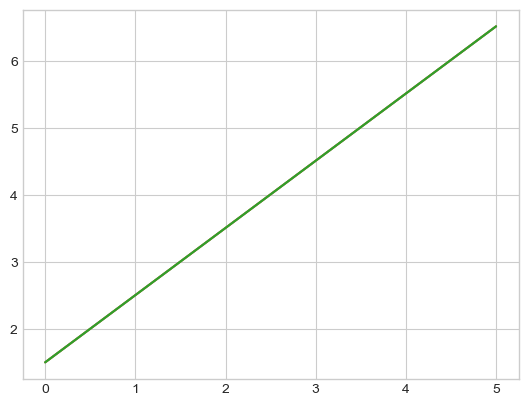

In [85]:
for i in range(0,model.par.T-2,1):
    plt.plot(sol.grid_w[i,:],sol.c[i,:,20])

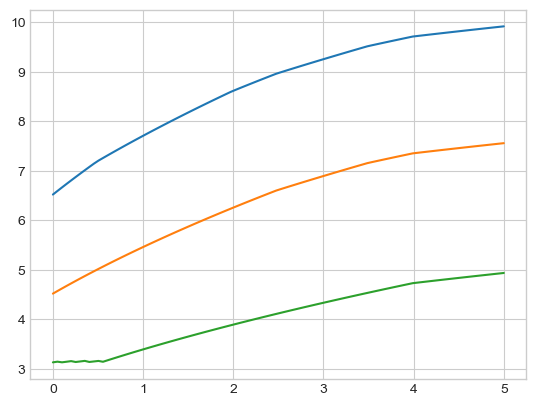

In [86]:
for i in range(0,model.par.T-2,1):
    plt.plot(sol.grid_w[i,:],sol.v[i,:,20])

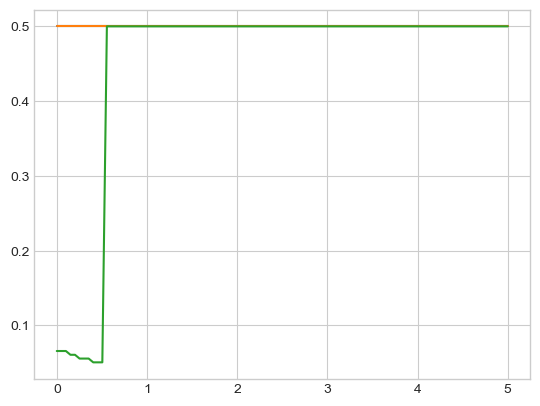

In [87]:
for i in range(0,model.par.T-2,1):
    plt.plot(sol.grid_w[i,:],sol.d[i,:,20])

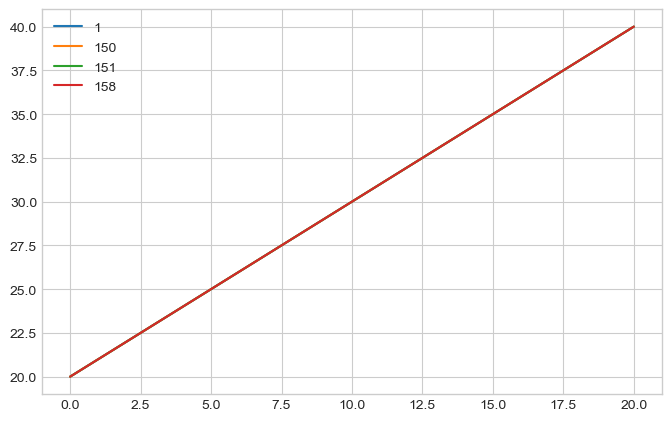

In [57]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
for age in [1, 150, 151, 158] :
    ax.plot(sol.grid_w[age,:],sol.c[age,:], label=age ,)

plt.legend()
plt.show()

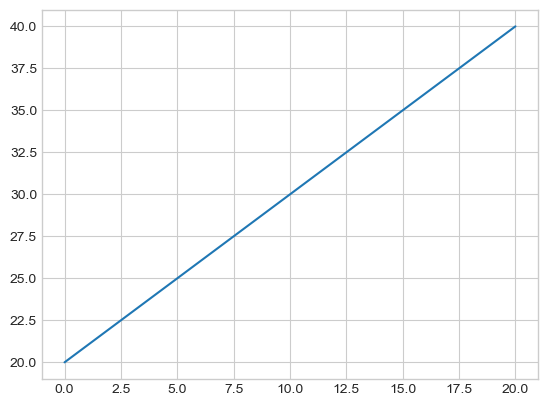

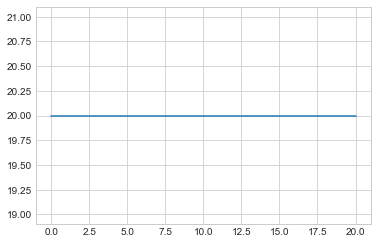

In [206]:
plt.plot(sol.grid_w[158,:],sol.d[158,:], label='Uniform distribution, $\epsilon$',)

Testing stuff

In [ ]:
import tools

sigma_xi = 0.1 # Transitory shock
sigma_psi = 0.1 # Permanent shock

# Discrete income shocks
low_p = 0.005 # Probability of very low shock (Called pi in slides)
low_val = 0.2 # Value of very small shock (Called mu in slides)

Neps = 8 # number of quadrature points for eps
Npsi = 8 # number of quadrature points for psi

eps,eps_w = tools.GaussHermite_lognorm(sigma_xi,Neps)

psi,psi_w = tools.GaussHermite_lognorm(sigma_psi,Npsi)

if low_p > 0:
    xi =  np.append(low_val+1e-8, (eps-low_p*low_val)/(1-low_p), axis=None) # +1e-8 makes it possible to take the log in simulation if low_val = 0
    xi_w = np.append(low_p, (1-low_p)*eps_w, axis=None)
    

else: # If no discrete shock then xi=eps
    par.xi = eps
    par.xi_w = eps_w




xi_vec = np.tile(xi,psi.size)       # Repeat entire array x times
psi_vec = np.repeat(psi,xi.size)    # Repeat each element of the array x times
xi_w_vec = np.tile(xi_w,psi.size)
psi_w_vec = np.repeat(psi_w,xi.size)

w = xi_w_vec * psi_w_vec
assert (1-sum(w) < 1e-8), 'the weights does not sum to 1'
Nshocks = w.size    # count number of shock nodes